In [37]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Описание данных

Id номер: от 1 до 214 (удален из CSV-файла)

RI: показатель преломления

Na: Натрий (измеряется в весовых процентах соответствующего оксида, как и атрибуты 4–10)

Mg: Магний

Al: Алюминий

Si: Кремний

K: Калий

Ca: Кальций

Ba: Барий

Fe: Железо

Тип стекла (классовый атрибут):

1 — оконное стекло зданий, флоат-обработка

2 — оконное стекло зданий, без флоат-обработки

3 — оконное стекло транспортных средств, флоат-обработка

4 — оконное стекло транспортных средств, без флоат-обработки (отсутствует в этом наборе)

5 — тара

6 — посуда

7 — фары

Целевая колонка - Тип стекла(последняя)

Значит многоклассовая классификация

In [38]:
df = pd.read_csv("glass.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [39]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


Удален 1 дубликат

4.	Оцените сбалансированность данных по классам (постройте гистограмму).

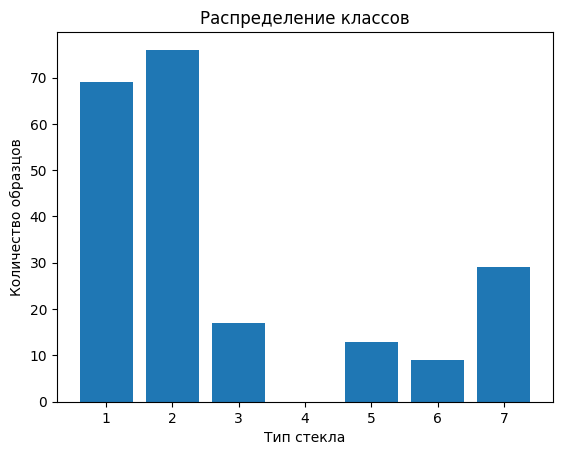

In [40]:
class_counts = df['Type'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Тип стекла')
plt.ylabel('Количество образцов')
plt.title('Распределение классов')
plt.show()

5. Классы несбалансированы, поэтому PR кривая

6. Удаление выбросов

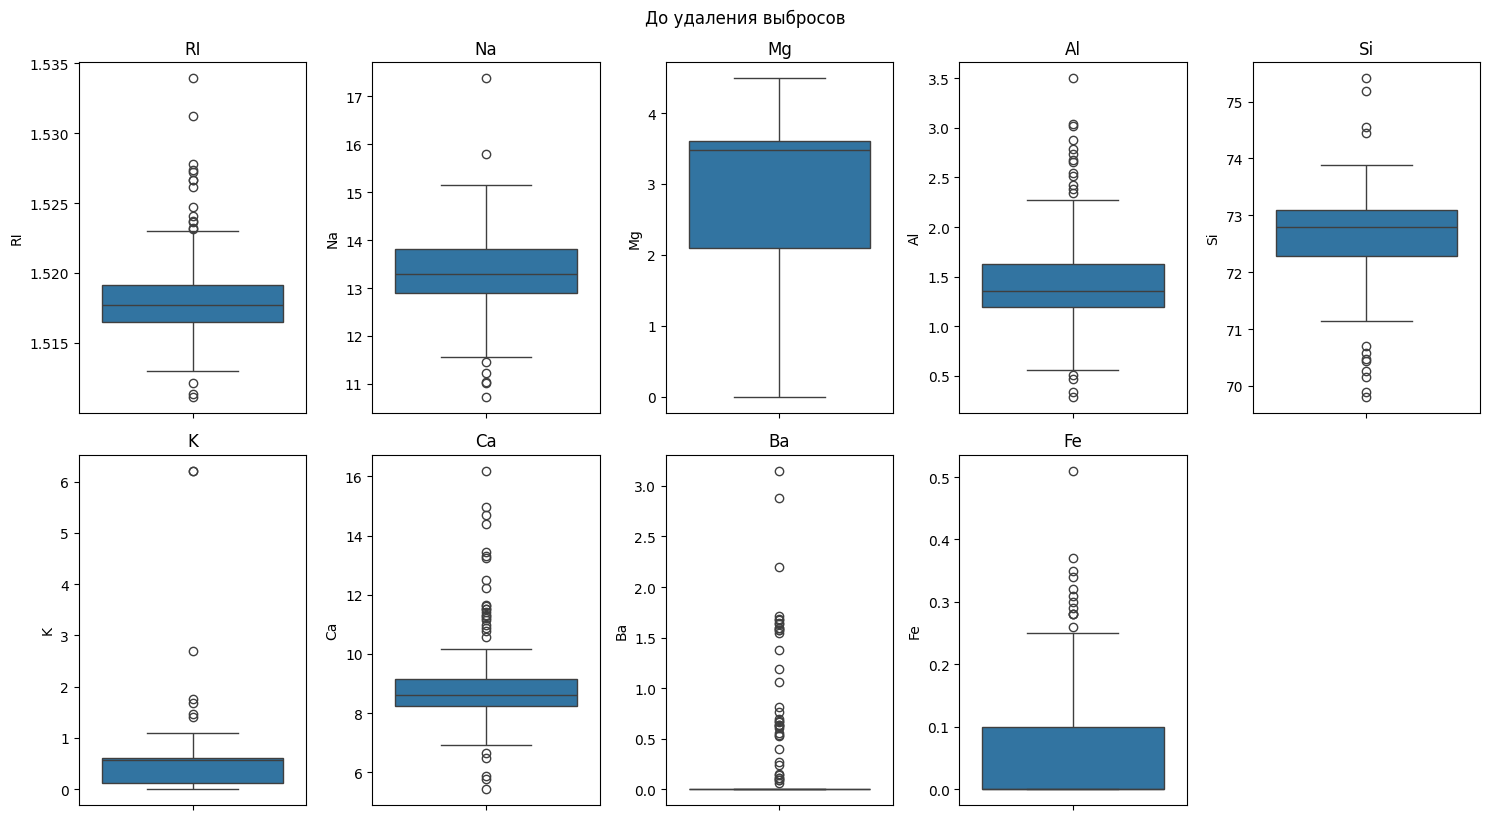

Удалено 78 записей


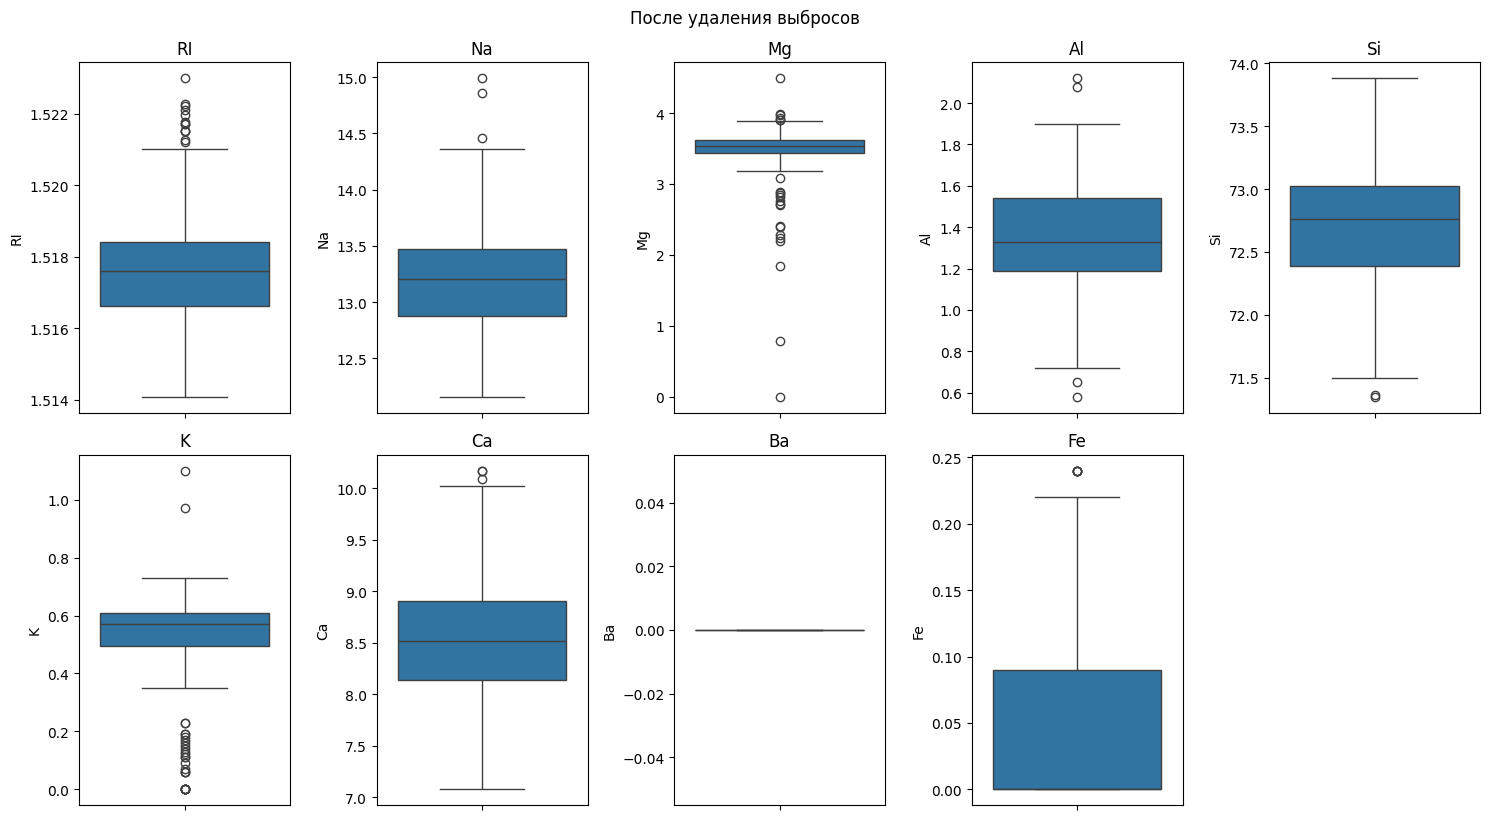

In [41]:
numeric_cols = df.columns.drop('Type')

# Функция для удаления выбросов с сохранением индексов
def remove_outliers(df, columns):
    clean_index = set(df.index)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_index = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].index
        clean_index.intersection_update(col_index)
    return df.loc[list(clean_index)]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.suptitle('До удаления выбросов', y=1.02)
plt.show()

# Удаляем выбросы
df_clean = remove_outliers(df.copy(), numeric_cols)
print(f"Удалено {len(df) - len(df_clean)} записей")

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
    plt.tight_layout()
plt.suptitle('После удаления выбросов', y=1.02)
plt.show()

7.	Заполнение пропущенных значений

In [42]:
print("Пропуски до заполнения:\n", df_clean.isnull().sum())

from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df_clean[df_clean.columns[:-1]] = num_imputer.fit_transform(df_clean[df_clean.columns[:-1]])

print("Пропуски после заполнения:\n", df_clean.isnull().sum())


Пропуски до заполнения:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
Пропуски после заполнения:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


8. Масштабирование числовых признаков

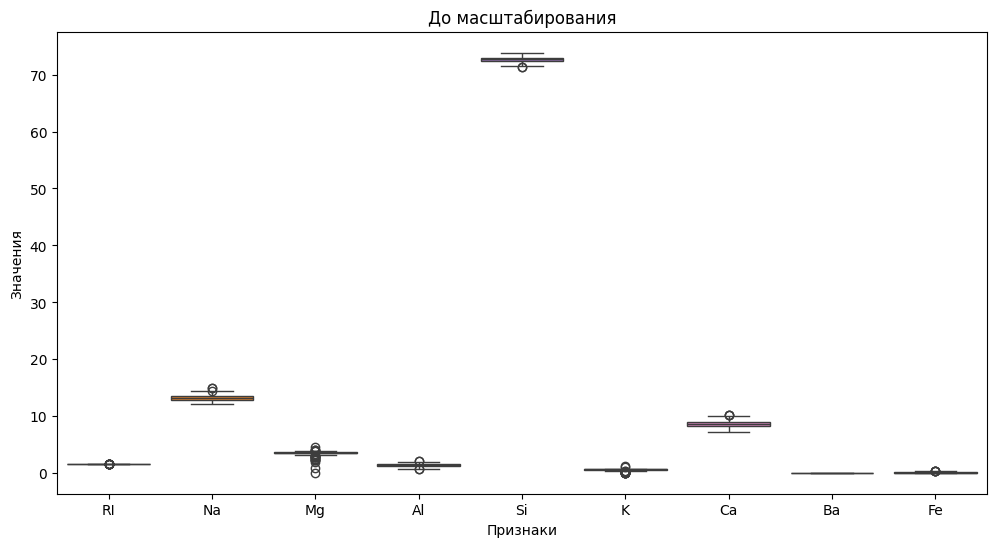

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(df_clean.drop(columns=['Type']))
plt.title('До масштабирования')
plt.xlabel('Признаки')
plt.ylabel('Значения')
plt.show()

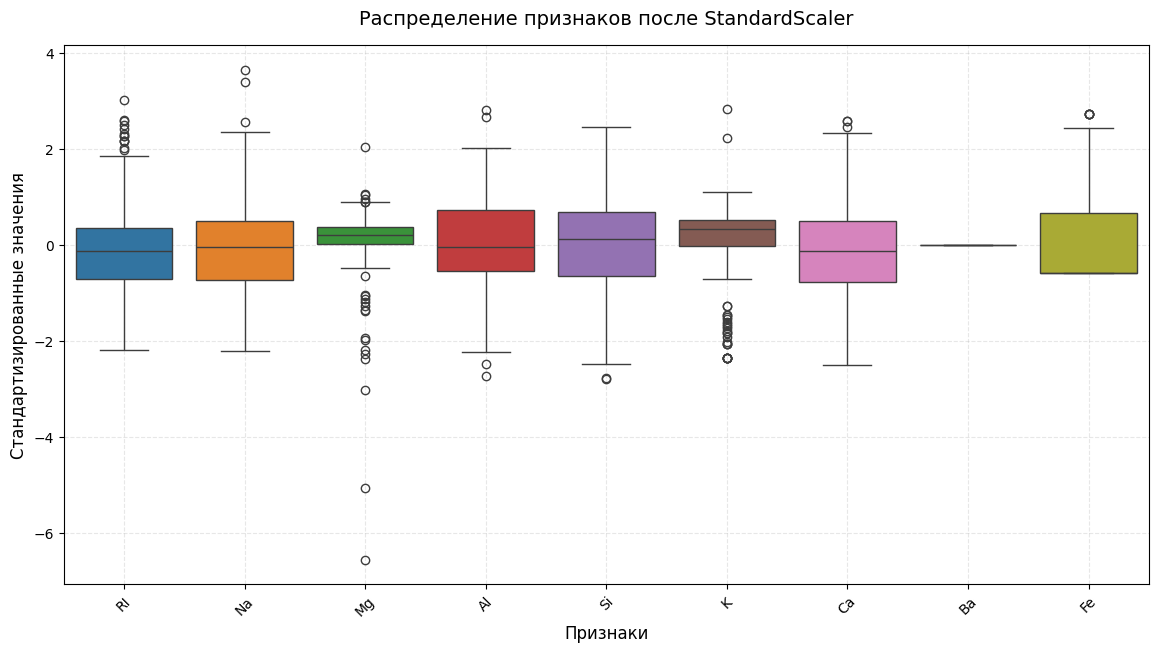

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_clean.drop(columns=['Type']))

# Новый DF с масштабированными значениями
df_scaled = pd.DataFrame(scaled_values, columns=df_clean.drop(columns=['Type']).columns, index=df_clean.index)

# Добавляем целевую переменную
df_scaled['Type'] = df_clean['Type'].copy()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_scaled.drop(columns=['Type']))
plt.title('Распределение признаков после StandardScaler', fontsize=14, pad=15)
plt.xlabel('Признаки', fontsize=12)
plt.ylabel('Стандартизированные значения', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Выбрал StandardScaler, так как он лучше подходит для данных, где важно сохранить информацию о выбросах и распределение не является равномерным

9. Замена категориальных признаков

В данном наборе данных только целевая переменная является категориальной, поэтому использую LabelEncoder

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_scaled['Type'] = le.fit_transform(df_scaled['Type'])

# Проверка
df_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.851883,0.848473,2.025616,-0.872113,-1.907292,-2.075601,0.240797,0.0,-0.590499,0
1,-0.138177,1.366677,0.323435,0.065155,0.061719,-0.093678,-1.273482,0.0,-0.590499,0
2,-0.975173,0.620463,0.227807,0.714033,0.600606,-0.518376,-1.355780,0.0,-0.590499,0
3,-0.108911,-0.042838,0.495566,-0.187187,-0.186998,0.331020,-0.631559,0.0,-0.590499,0
4,-0.249386,0.081531,0.361687,-0.367430,0.787144,0.236642,-0.878453,0.0,-0.590499,0


In [46]:
df_scaled.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
176,0.704672,1.594686,-1.990764,0.786130,-0.684433,-2.358733,1.590481,0.0,-0.590499,4
177,0.891972,1.159395,-1.952513,-0.547674,0.123898,-2.358733,1.919672,0.0,-0.590499,4
178,0.259835,2.548182,-2.277649,1.002423,-0.663706,-2.358733,1.080235,0.0,-0.590499,4
179,0.394457,1.781240,-2.373277,1.146618,-0.062640,-2.358733,1.178992,0.0,-0.590499,4
181,0.605169,3.646774,-5.069989,1.435008,-0.414989,-2.358733,2.215944,0.0,-0.590499,4


10. Оценка корреляции между признаками

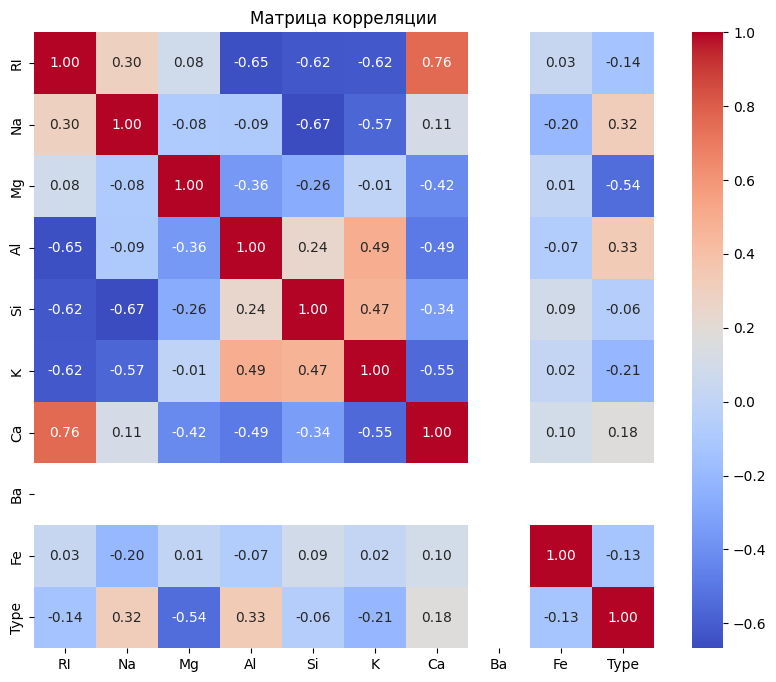

Признаки с высокой корреляцией: {'Ca'}


In [48]:
plt.figure(figsize=(10, 8))
corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

print("Признаки с высокой корреляцией:", high_corr)

11. Решение задачи классификации


Вариант 16

Набор данных 2

Классификаторы 1, 3

Разделение на выборки

In [50]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Type', axis=1)
y = df_scaled['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Классификатор K ближайших соседей

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score

# Параметры для перебора
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, knn_params, cv=3, scoring='f1_macro')

# Обучение
knn_grid.fit(X_train, y_train)

print("Лучшие параметры для KNN:")
print(knn_grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Лучшие параметры для KNN:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [56]:
y_pred_knn = knn_grid.predict(X_test)
print("Отчет KNN:")
print(classification_report(y_test, y_pred_knn))

Отчет KNN:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        18
           1       0.61      0.69      0.65        16
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.56        41
   macro avg       0.48      0.49      0.48        41
weighted avg       0.54      0.56      0.55        41



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Линейный классификатор (персептрон)

In [57]:
from sklearn.linear_model import Perceptron

# Параметры для перебора
perceptron_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4],
    'eta0': [0.1, 1.0]  # Скорость обучения
}

# Создаем классификатор
perceptron = Perceptron(random_state=42)

# Настройка с кросс-валидацией
perceptron_grid = GridSearchCV(perceptron, perceptron_params, cv=3, scoring='f1_macro')

# Обучение
perceptron_grid.fit(X_train, y_train)

# Лучшие параметры
print("\nЛучшие параметры для Perceptron:")
print(perceptron_grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(



Лучшие параметры для Perceptron:
{'alpha': 0.001, 'eta0': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.001}


In [58]:
y_pred_perc = perceptron_grid.predict(X_test)
print("Отчет Perceptron:")
print(classification_report(y_test, y_pred_perc))

Отчет Perceptron:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        18
           1       0.47      0.44      0.45        16
           2       0.20      0.20      0.20         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.49        41
   macro avg       0.64      0.64      0.64        41
weighted avg       0.49      0.49      0.49        41



Сравнение классификаторов по метрикам

In [60]:
from sklearn.metrics import f1_score

knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
perc_f1 = f1_score(y_test, y_pred_perc, average='macro')

print(f"\nF1-score (macro average):")
print(f"KNN: {knn_f1:.3f}")
print(f"Perceptron: {perc_f1:.3f}")

if knn_f1 > perc_f1:
    print("\nKNN показал лучшие результаты на этом наборе данных")
else:
    print("\nPerceptron показал лучшие результаты на этом наборе данных")


F1-score (macro average):
KNN: 0.485
Perceptron: 0.638

Perceptron показал лучшие результаты на этом наборе данных


Многоклассовая классификация

i.	Постройка классификации по схеме «один-против-всех»

Для многоклассовой классификации я выбрал micro F1-score в качестве метрики для refit, так как она учитывает дисбаланс классов

In [62]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

classifiers = {
    'KNN': OneVsRestClassifier(KNeighborsClassifier()),
    'Perceptron': OneVsRestClassifier(Perceptron())
}

params = {
    'KNN': {'estimator__n_neighbors': [3, 5, 7],
            'estimator__weights': ['uniform', 'distance']},
    'Perceptron': {'estimator__alpha': [0.0001, 0.001, 0.01],
                  'estimator__penalty': [None, 'l2']}
}

results = {}
for name, clf in classifiers.items():
    grid = GridSearchCV(clf, params[name], cv=3,
                       scoring='f1_micro',
                       refit=True)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    results[name] = {
        'model': grid,
        'report': classification_report(y_test, y_pred),
        'f1_micro': f1_score(y_test, y_pred, average='micro'),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    }

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

ii.	Оценка качества классификации каждого класса с помощью PR кривой


KNN - Оценка по классам:
Класс 1 (AP: 0.67)


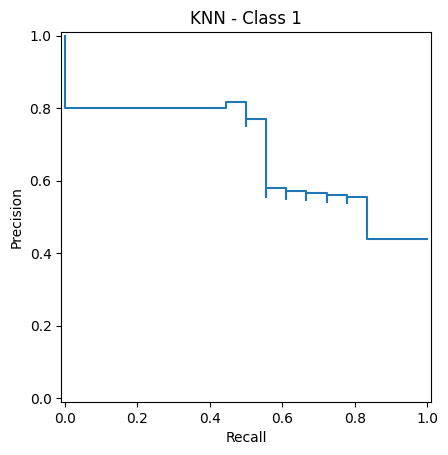

Класс 2 (AP: 0.69)


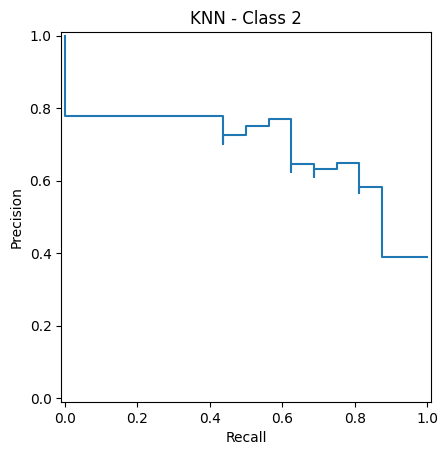

Класс 3 (AP: 0.30)


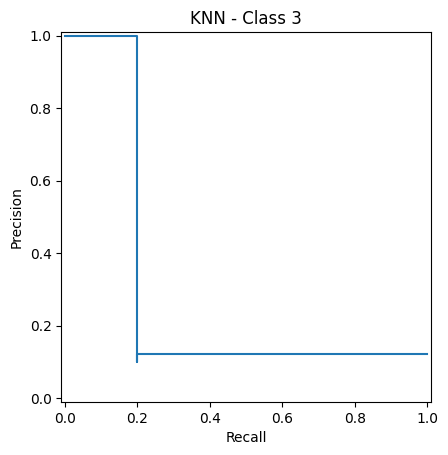

Класс 5 (AP: 0.02)


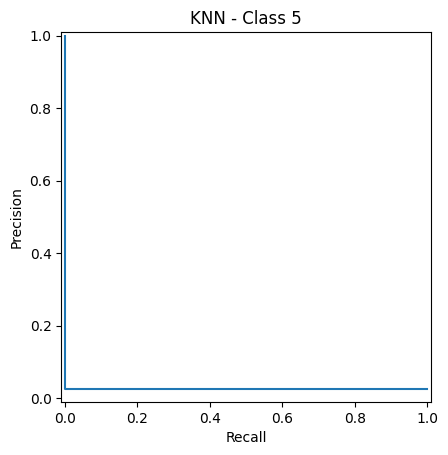

Класс 6 (AP: 1.00)


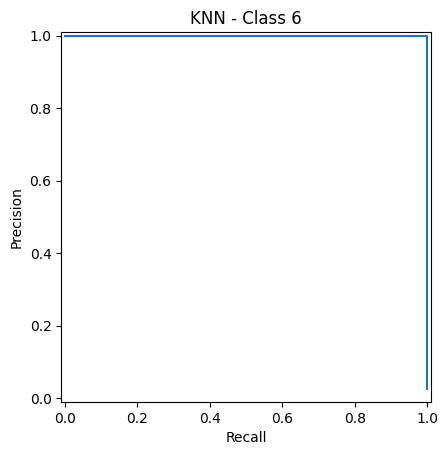


Perceptron - Оценка по классам:
Класс 1 (AP: 0.71)


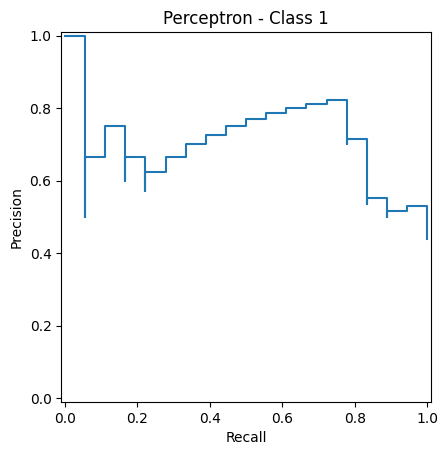

Класс 2 (AP: 0.82)


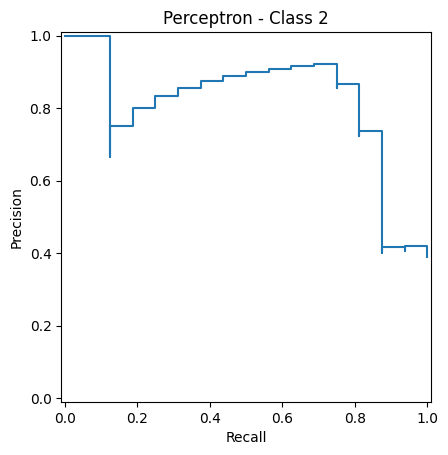

Класс 3 (AP: 0.19)


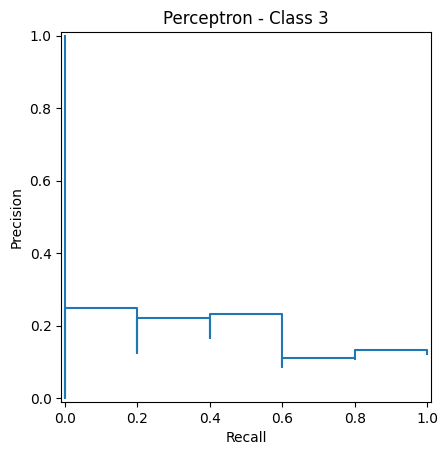

Класс 5 (AP: 0.33)


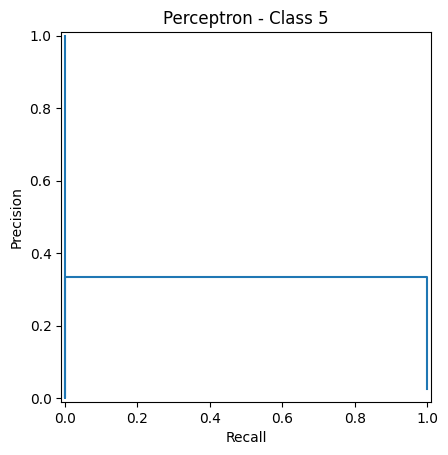

Класс 6 (AP: 1.00)


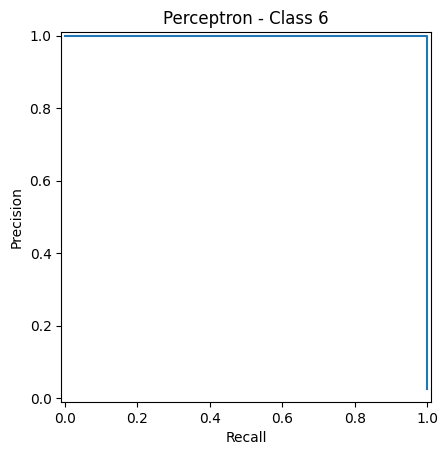

In [63]:
for name in results:
    print(f"\n{name} - Оценка по классам:")
    estimator = results[name]['model']
    y_score = estimator.decision_function(X_test) if hasattr(estimator, "decision_function") else estimator.predict_proba(X_test)

    for class_id in range(len(le.classes_)):
        precision, recall, _ = precision_recall_curve(
            y_test == class_id,
            y_score[:, class_id] if y_score.ndim > 1 else y_score
        )
        ap_score = average_precision_score(
            y_test == class_id,
            y_score[:, class_id] if y_score.ndim > 1 else y_score
        )

        print(f"Класс {le.classes_[class_id]} (AP: {ap_score:.2f})")
        PrecisionRecallDisplay(precision=precision, recall=recall).plot()
        plt.title(f'{name} - Class {le.classes_[class_id]}')
        plt.show()

iii. Микро- и макро-усредненные кривые

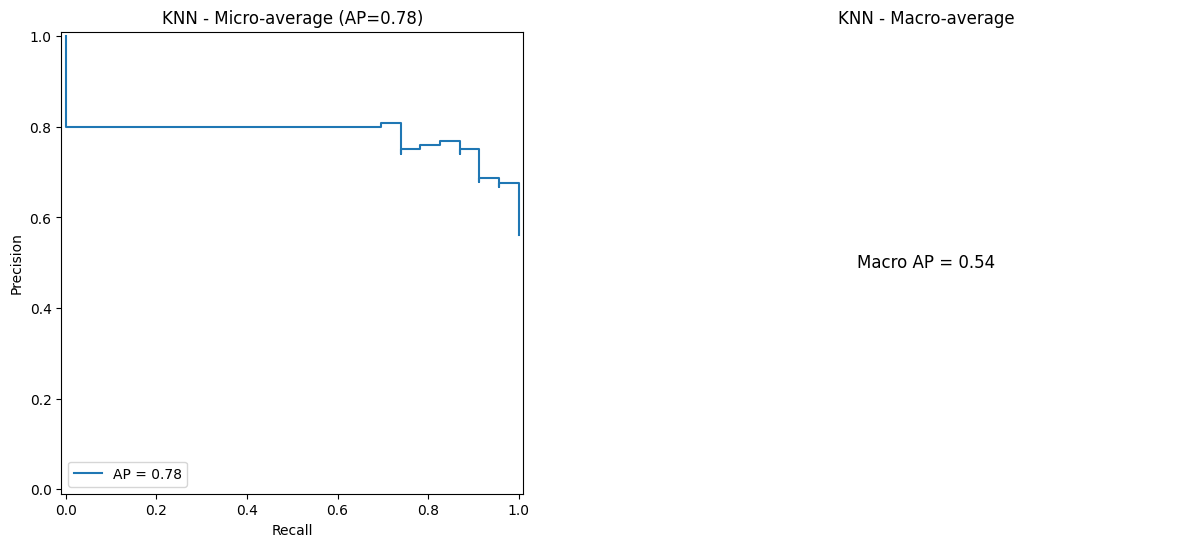

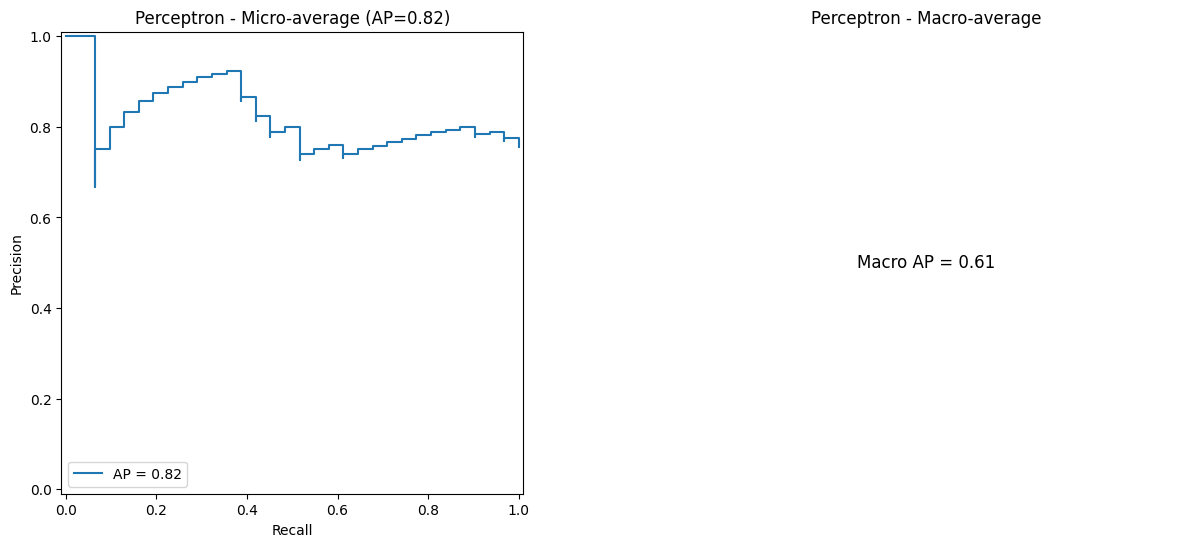

In [69]:
for name in results:
    estimator = results[name]['model']
    y_score = estimator.decision_function(X_test) if hasattr(estimator, "decision_function") else estimator.predict_proba(X_test)

    # Micro-average
    precision_micro, recall_micro, _ = precision_recall_curve(
        (y_test.to_numpy() == y_score.argmax(axis=1)),
        y_score.max(axis=1)
    )
    ap_micro = average_precision_score(
        (y_test.to_numpy() == y_score.argmax(axis=1)),
        y_score.max(axis=1),
        average='micro'
    )

    # Macro-average вычисляется через average_precision_score
    ap_macro = average_precision_score(y_test, y_score, average='macro')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    PrecisionRecallDisplay(precision=precision_micro, recall=recall_micro,
                          average_precision=ap_micro).plot(ax=ax1)
    ax1.set_title(f'{name} - Micro-average (AP={ap_micro:.2f})')

    # Для macro просто выводим значение AP
    ax2.text(0.5, 0.5, f'Macro AP = {ap_macro:.2f}',
            ha='center', va='center', fontsize=12)
    ax2.set_title(f'{name} - Macro-average')
    ax2.axis('off')
    plt.show()

e. Линейный классификатор с регуляризацией

In [70]:
# Без регуляризации
perceptron = OneVsRestClassifier(Perceptron(penalty=None, max_iter=1000))
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print("Без регуляризации:")
print(classification_report(y_test, y_pred))

# С L2 регуляризацией
perceptron_l2 = OneVsRestClassifier(Perceptron(penalty='l2', alpha=0.01, max_iter=1000))
perceptron_l2.fit(X_train, y_train)
y_pred_l2 = perceptron_l2.predict(X_test)
print("\nС L2 регуляризацией:")
print(classification_report(y_test, y_pred_l2))

# Сравнение метрик
print("\nF1-score сравнение:")
print(f"Без регуляризации: {f1_score(y_test, y_pred, average='macro'):.3f}")
print(f"С L2 регуляризацией: {f1_score(y_test, y_pred_l2, average='macro'):.3f}")

Без регуляризации:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.74      0.88      0.80        16
           2       0.50      0.20      0.29         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.76        41
   macro avg       0.80      0.77      0.77        41
weighted avg       0.74      0.76      0.74        41


С L2 регуляризацией:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        18
           1       0.67      0.75      0.71        16
           2       0.00      0.00      0.00         5
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1

    accuracy                           0.61        41
   macro avg       0.57      0.67      0.60        41
weighted avg       0.60      0.61   

12.	Сравнение кривых для классификаторов

<ipython-input-72-3bc5d91a24b5>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test.ravel() == y_score.argmax(axis=1).ravel(),
<ipython-input-72-3bc5d91a24b5>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test.ravel() == y_score.argmax(axis=1).ravel(),


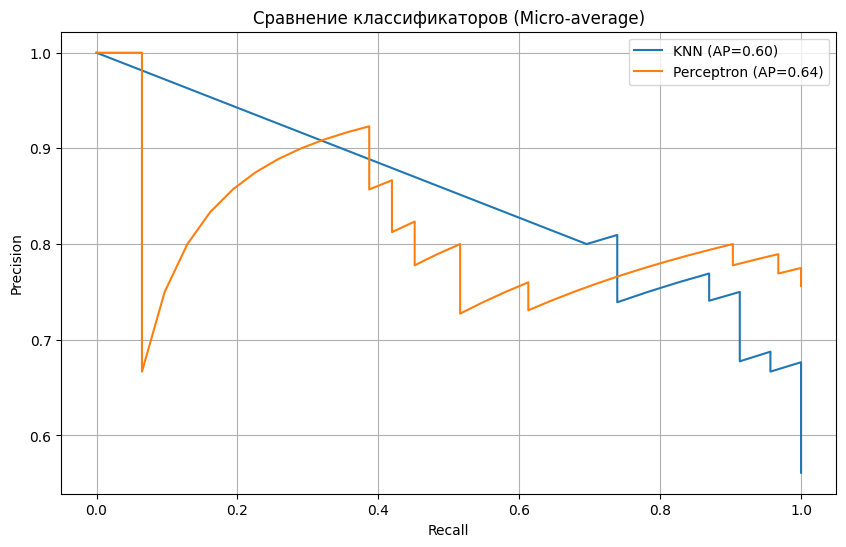


Сравнение метрик:
   Classifier  F1 Micro  F1 Macro  AP Micro
1  Perceptron  0.756098  0.772698  0.642960
0         KNN  0.560976  0.484967  0.596359


In [72]:
from sklearn.metrics import roc_auc_score

# Сравнение по AUC-PR
plt.figure(figsize=(10, 6))
for name in results:
    estimator = results[name]['model']
    y_score = estimator.decision_function(X_test) if hasattr(estimator, "decision_function") else estimator.predict_proba(X_test)

    precision, recall, _ = precision_recall_curve(
        y_test.ravel() == y_score.argmax(axis=1).ravel(),
        y_score.max(axis=1)
    )
    plt.plot(recall, precision, label=f'{name} (AP={average_precision_score(y_test, y_score, average="micro"):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Сравнение классификаторов (Micro-average)')
plt.legend()
plt.grid()
plt.show()

# Сравнение по метрикам
metrics = pd.DataFrame({
    'Classifier': list(results.keys()),
    'F1 Micro': [res['f1_micro'] for res in results.values()],
    'F1 Macro': [res['f1_macro'] for res in results.values()],
    'AP Micro': [average_precision_score(y_test,
               res['model'].decision_function(X_test) if hasattr(res['model'], "decision_function")
               else res['model'].predict_proba(X_test), average='micro')
               for res in results.values()]
})

print("\nСравнение метрик:")
print(metrics.sort_values('F1 Macro', ascending=False))

Вывод: Перцептрон лучше показал себя на этих данных: лучше предсказывает и  работает с редкими классами